# Gender Analysis
Include information and graphs that help answering the following questions
* Do men or women dominate speaking roles in Hollywood movies?
* Has gender balance in speaking roles changed over time?
* Do films in which men do more speaking make a lot more money than films in which women speak more?

## Some graphs to include
Plot the following by year
* General proportion of male lead.
* Proportion of words spoken.
* Lead age average by gender
* XXWords per non-lead person on average depending on gender (the same proportion stands as with the lead?)
* Gross vs gender speaking percentage: gross on X, male word % on y. .
To-do:
* Show imbalance in terms of number of actors per gender. Even in female-led movies, there are more male actors on average.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
sns.set_theme(style="darkgrid")

In [2]:
# Load the dataset
url = 'data/train.csv'
data = pd.read_csv(url)

In [3]:
# Dropping 0-word entries

# Get indexes for which the number of words of female or male is 0
dropIndex = data[ (data['Number words female'] == 0) | (data['Number words male'] == 0) ].index

# Delete the rows from the dataset
data.drop(dropIndex , inplace=True)
data['Number words co-lead'] = data['Number of words lead'] - data['Difference in words lead and co-lead']

In [4]:
# Index by year for easier management of data
data.reset_index(inplace=True)
data.set_index('Year', inplace=True) 
data.sort_index(ascending=True, inplace=True);

# Select years to focus on (start in 1981, before there is little data)
years = np.array(data.index.unique())
years = years[years > 1980]

years_dict = {'Year': years} # create dict of years for feeding a pandas dataframe
analysis_df = pd.DataFrame(data=years_dict) # create a dataframe with a first column 'Year'
analysis_df.set_index('Year');

In [5]:
# Populate analysis_df with relevant stats, consolidated by year

m_lead_p_year = []
m_words_p_year = []
f_age_mean = []
m_age_mean = []
f_lead_age_mean = []
#f_colead_age_mean = []
m_lead_age_mean = []


for year in years:
    
    year_df = data.loc[[year]] # Create a DF with the year (making sure it comes as a matrix)
    
    # % of male lead actors
    num_movies = len(year_df)
    m_lead_p_year.append((year_df['Lead'] == 'Male').sum() / num_movies)
    
    # % of words spoken by male
    num_words_male = year_df['Number words male'].sum()
    num_words_male += year_df[(year_df['Lead'] == 'Male')]['Number of words lead'].sum()
    num_words_male += year_df[(year_df['Lead'] == 'Female')]['Number words co-lead'].sum()
    m_words_p_year.append(num_words_male / year_df['Total words'].sum())
    
    # Female and male age average
    f_age_mean.append(year_df['Mean Age Female'].mean())
    m_age_mean.append(year_df['Mean Age Male'].mean())
    
    # Female and male lead age average
    f_lead_age_mean.append(year_df[(year_df['Lead'] == 'Female')]['Age Lead'].mean())
    m_lead_age_mean.append(year_df[(year_df['Lead'] == 'Male')]['Age Lead'].mean())
    
    
analysis_df['Male lead %'] = m_lead_p_year
analysis_df['Male words %'] = m_words_p_year
analysis_df['Mean age female'] = f_age_mean
analysis_df['Mean age male'] = m_age_mean
analysis_df['Female lead age mean'] = f_lead_age_mean
analysis_df['Male lead age mean'] = m_lead_age_mean

In [6]:
analysis_df.describe()

,Year,Male lead %,Male words %,Mean age female,Mean age male,Female lead age mean,Male lead age mean
count,35.000000,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000
mean,1998.000000,0.766779,0.748485,35.557863,42.261814,33.731939,39.975132
std,10.246951,0.093939,0.039698,3.040956,2.752209,5.298813,3.499240
min,1981.000000,0.473684,0.610491,28.281667,38.410913,25.600000,33.166667
25%,1989.500000,0.715476,0.732599,33.859821,40.840010,29.375000,37.511111
50%,1998.000000,0.780488,0.754012,35.312446,41.903704,32.928571,40.000000
75%,2006.500000,0.818182,0.773056,37.294010,43.323220,36.886364,41.695000
max,2015.000000,1.000000,0.840910,43.046825,53.223958,48.250000,48.833333


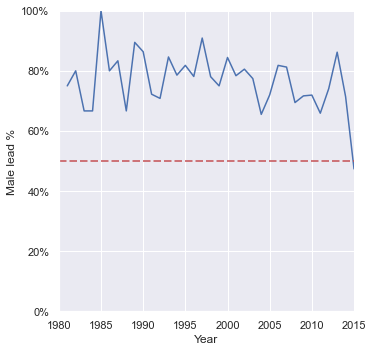

In [7]:
male_lead_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Male lead %', kind='line');
male_lead_plot.set(xlim=(1980,2015), ylim=(0,1))
male_lead_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
male_lead_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

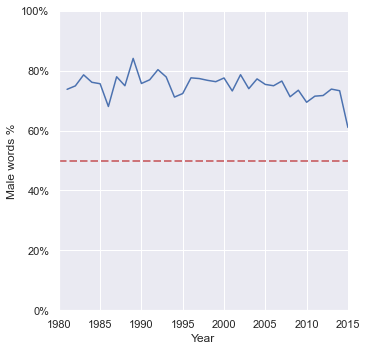

In [8]:
male_words_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Male words %', kind='line');
male_words_plot.set(xlim=(1980,2015), ylim=(0,1))
male_words_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
male_words_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

In [9]:
analysis_df[-15:-1]

,Year,Male lead %,Male words %,Mean age female,Mean age male,Female lead age mean,Male lead age mean
20,2001,0.783784,0.732234,32.846718,38.911682,33.250000,36.379310
21,2002,0.805556,0.786526,34.944907,40.476268,32.857143,39.068966
22,2003,0.774194,0.739834,35.490092,42.522945,29.000000,41.750000
23,2004,0.655172,0.772463,35.105583,40.875664,32.500000,39.736842
24,2005,0.720000,0.754012,35.381619,42.875380,29.000000,33.166667
25,2006,0.818182,0.749640,34.134632,42.601113,45.250000,37.222222
26,2007,0.812500,0.765292,37.088021,43.756065,33.666667,43.538462
27,2008,0.694444,0.712895,36.919180,42.356801,36.545455,41.640000
28,2009,0.716667,0.734631,38.141111,41.607927,38.000000,41.232558
29,2010,0.719298,0.694522,39.022048,44.399790,37.062500,41.390244


## Gross vs. gender speaking balance

In [10]:
m_words_p = []
for (idx, row) in data.iterrows():
    total_words = row.loc['Total words']
    words_male = row.loc['Number words male']
    words_lead = row.loc['Number of words lead']
    lead = row.loc['Lead']
    if lead == 'Male':
        m_words_p.append((words_male + words_lead) / total_words)
    else:
        diff_w_lead_colead = row['Difference in words lead and co-lead']
        words_colead = words_lead - diff_w_lead_colead
        m_words_p.append((words_male + words_colead) / total_words)

data['Male words %'] = m_words_p

In [11]:
data.head()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,Number words co-lead,Male words %
Year,,,,,,,,,,,,,,,,
1939,218,1326,9092,3060.0,1709,7,3,4706,839.0,47.166667,36.333333,17.0,35.0,Female,1351.0,0.666190
1939,544,5146,15363,6350.0,1204,10,1,3867,45.0,49.800000,34.000000,38.0,34.0,Male,5146.0,0.665039
1949,1011,1512,9053,3160.0,1760,8,2,4381,8.0,45.500000,54.500000,44.0,28.0,Male,1400.0,0.832984
1954,578,8528,18744,9974.0,4878,2,2,242,30.0,41.500000,38.500000,46.0,25.0,Male,5096.0,0.545028
1954,856,1939,10553,3954.0,2138,11,2,4660,185.0,38.714286,33.500000,30.0,30.0,Male,1816.0,0.816261


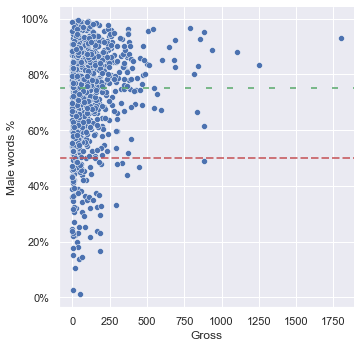

In [12]:
gross_plot = sns.relplot(data=data, x=data['Gross'], y=data['Male words %']);
gross_plot.ax.axline(xy1=(200, 0.5), slope=0, color="r", dashes=(5, 2))
gross_plot.ax.axline(xy1=(200, 0.75), slope=0, color="g", dashes=(4, 10))
gross_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

Above the red dotted line are the movies where male actors speak more than 50% of the words (gender balance).

Above the green dotted line are the movies where male actors speak more than 75% of the words (overall male speaking % mean).

On both accounts, movies with higher gross (X axis) tend to have more % of the words spoken by males.

## Other tests
Below are other tests.. for example, exploring if there are analysis respecting age. For example, the mean age of females in films is 7 years younger than males. Can other interesting relationships can be seen?

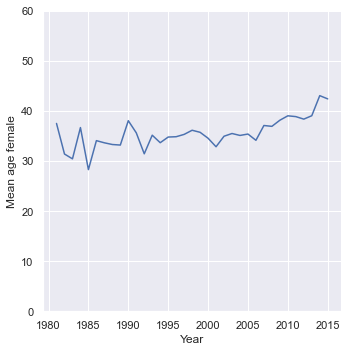

In [13]:
female_age_average_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Mean age female', kind='line');
female_age_average_plot.set(ylim=(0,60));

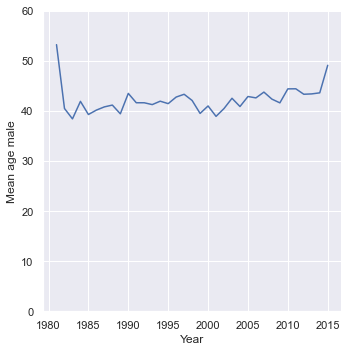

In [14]:
female_age_average_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Mean age male', kind='line');
female_age_average_plot.set(ylim=(0,60));

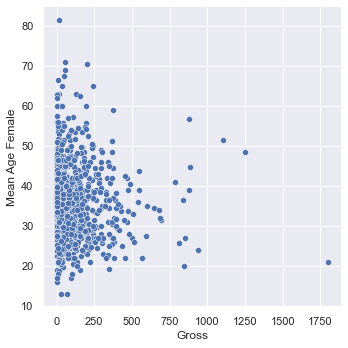

In [16]:
gross_vs_female_age = sns.relplot(data=data, x=data['Gross'], y=data['Mean Age Female']);